In [74]:
import pandas as pd
import numpy as np
# from mlxtend.frequent_patterns import apriori, association_rules
# from mlxtend.preprocessing import TransactionEncoder

### Preprocessing the data into a more suitable format

In [75]:
data = pd.read_csv("dataset/recipe_dataset.csv")
data = data.head(10000)
data = data.drop(data.columns[0], axis=1)

data

,recipe_id,recipe_name,url,recipe_Ingredients,Instructions,cuisine,Prep Time in Minutes
0,1,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"2 cups chicken broth, 1 (14.5 ounce) can diced...","Place chicken broth, tomatoes, flour, chili po...",['Mexican Inspired'],480
1,2,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"2.6666667461395 cups all-purpose flour, 1.5 te...",Preheat the oven to 350 degrees F (175 degrees...,['American'],60
2,3,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"1 pound flounder fillets, 0.5 teaspoon salt, g...",Gather all ingredients. Preheat the oven to 40...,['American'],25
3,4,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o...",Preheat the oven to 450 degrees F (230 degrees...,['American'],20
4,5,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333...","Beat egg with a fork in a small, heavy saucepa...",['German'],10
...,...,...,...,...,...,...,...
9995,9996,Earthquake Cookies,https://www.allrecipes.com/recipe/10904/earthq...,"1 (18.25 ounce) package devil's food cake mix,...","Mix cake mix, eggs, shortening, and water in a...",['American'],10
9996,9997,Pistachio-Crusted Salmon,https://www.allrecipes.com/recipe/269394/pista...,"0.25 cup crushed pistachios, 2 tablespoons pan...",Preheat the oven to 375 degrees F (190 degrees...,['American'],15
9997,9998,Classic Shepherd&#39;s Pie,https://www.allrecipes.com/recipe/217812/class...,"1 tablespoon vegetable oil, 1 onion, chopped, ...",Preheat the oven to 350 degrees F (180 degrees...,['Uk And Ireland'],35
9998,9999,One-Pot Spaghetti with Meat Sauce,https://www.allrecipes.com/recipe/269004/one-p...,"1 pound ground Italian sausage, 1 small white ...","Combine ground sausage, onions, and garlic in ...",['Italian'],30


In [76]:
ingredients = []
with open('dataset/recipe_ingredient_pairs.txt', 'r', encoding='utf-8') as file:
    for line in file:
        # Split on the first occurrence of ' - ' to handle ingredients with hyphens
        recipe_id, ingredient = line.strip().split(' - ', 1)
        ingredients.append({'recipe_id': int(recipe_id), 'ingredient': ingredient})
    
ingredients_df = pd.DataFrame(ingredients)
ingredients_df

,recipe_id,ingredient
0,1,tomatoes
1,1,purpose flour
2,1,clove garlic
3,1,cayenne pepper
4,1,skinless
...,...,...
93390,12184,miniature marshmallows
93391,12184,milk
93392,12184,dash salt
93393,12184,chips


In [77]:
df = pd.merge(ingredients_df, data, on='recipe_id', how='inner')
df.drop(columns=['url','recipe_Ingredients','Instructions','cuisine','Prep Time in Minutes'], inplace=True)
df

,recipe_id,ingredient,recipe_name
0,1,tomatoes,Super Easy Slow Cooker Chicken Enchilada Meat
1,1,purpose flour,Super Easy Slow Cooker Chicken Enchilada Meat
2,1,clove garlic,Super Easy Slow Cooker Chicken Enchilada Meat
3,1,cayenne pepper,Super Easy Slow Cooker Chicken Enchilada Meat
4,1,skinless,Super Easy Slow Cooker Chicken Enchilada Meat
...,...,...,...
76842,10000,kidney beans,Slow Cooker Cowboy Beans
76843,10000,lima beans,Slow Cooker Cowboy Beans
76844,10000,onions,Slow Cooker Cowboy Beans
76845,10000,brown sugar,Slow Cooker Cowboy Beans


# Q2 a

In [78]:
#cuisine_initial is the cuisine of the scraped 10,000 recipes

cuisine_initial = data
df_cuisine_ini = cuisine_initial[['recipe_name','recipe_Ingredients']]
df_cuisine_ini

,recipe_name,recipe_Ingredients
0,Super Easy Slow Cooker Chicken Enchilada Meat,"2 cups chicken broth, 1 (14.5 ounce) can diced..."
1,Avocado Quick Bread,"2.6666667461395 cups all-purpose flour, 1.5 te..."
2,Quick and Easy Baked Fish Fillet,"1 pound flounder fillets, 0.5 teaspoon salt, g..."
3,Roasted Kohlrabi,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o..."
4,Custard Buttercream,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333..."
...,...,...
9995,Earthquake Cookies,"1 (18.25 ounce) package devil's food cake mix,..."
9996,Pistachio-Crusted Salmon,"0.25 cup crushed pistachios, 2 tablespoons pan..."
9997,Classic Shepherd&#39;s Pie,"1 tablespoon vegetable oil, 1 onion, chopped, ..."
9998,One-Pot Spaghetti with Meat Sauce,"1 pound ground Italian sausage, 1 small white ..."


In [79]:
size_controlled_cuisines = []
no_of_cuisines = 10

for i in range(0, no_of_cuisines):
    print(i)
    d={}
    d['recipe_id'] = []
    d['ingredients'] = []
    for j in range(0, len(df_cuisine_ini)):
        n = len(df_cuisine_ini['recipe_Ingredients'][j].split(','))
        #take out random n ingredients from the ingredients list
        ingredient_random = ingredients_df['ingredient'].sample(n=n).to_list()
        # print(ingredient_random)
        d['recipe_id'].append("R"+str(j+1))
        d['ingredients'].append(ingredient_random)
    df = pd.DataFrame(d)
    size_controlled_cuisines.append(df)

# size_controlled_cuisines




0
1
2
3
4
5
6
7
8
9


In [80]:
len(size_controlled_cuisines[4]['ingredients'][8]), len(size_controlled_cuisines[5]['ingredients'][8])

(21, 21)

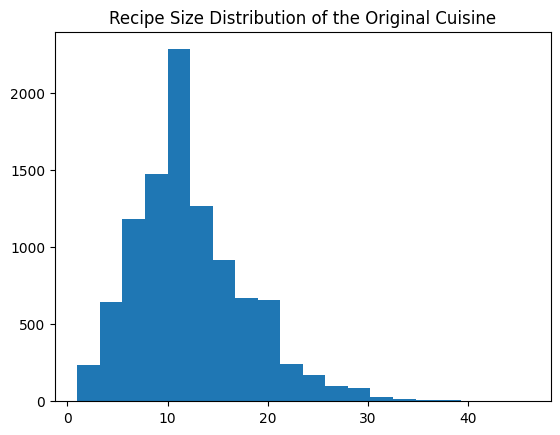

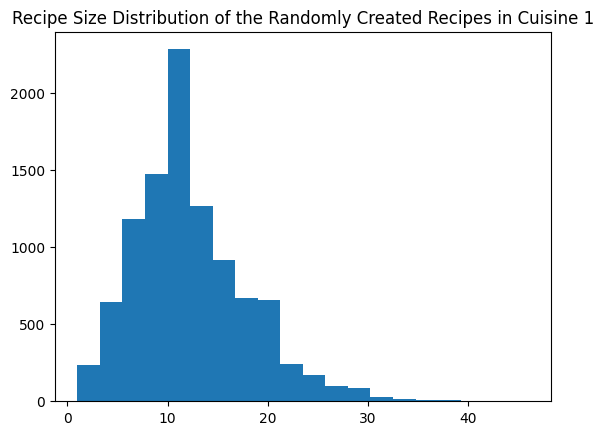

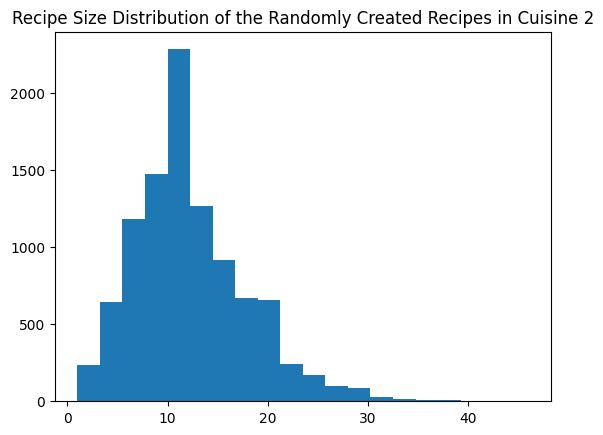

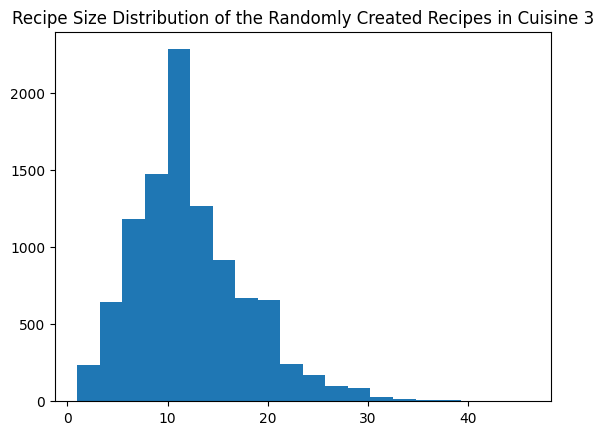

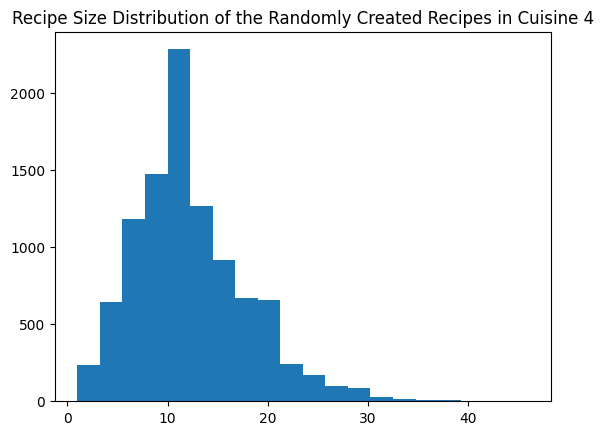

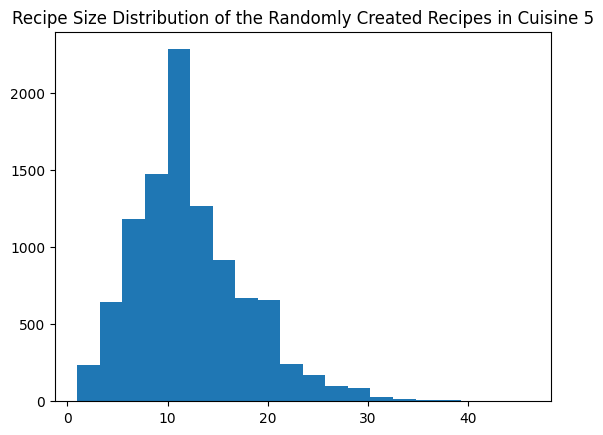

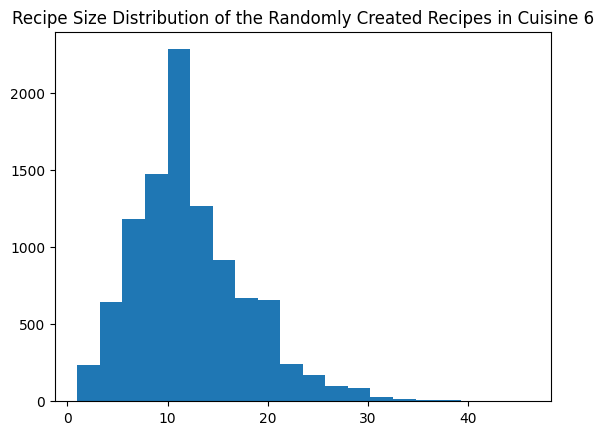

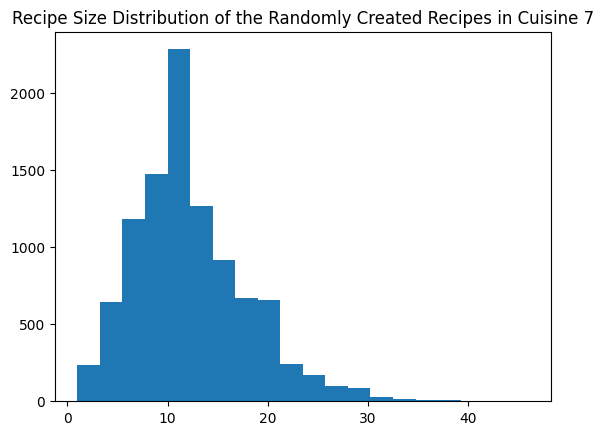

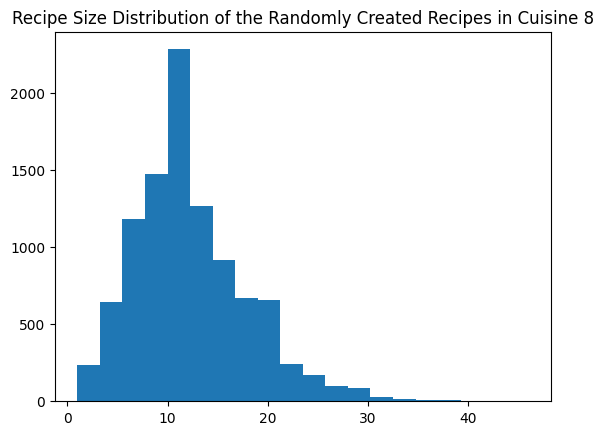

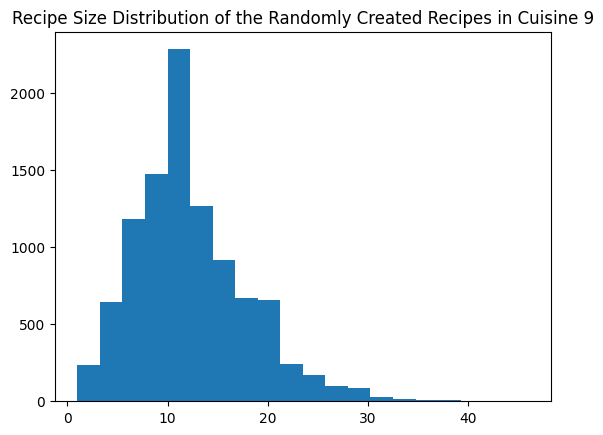

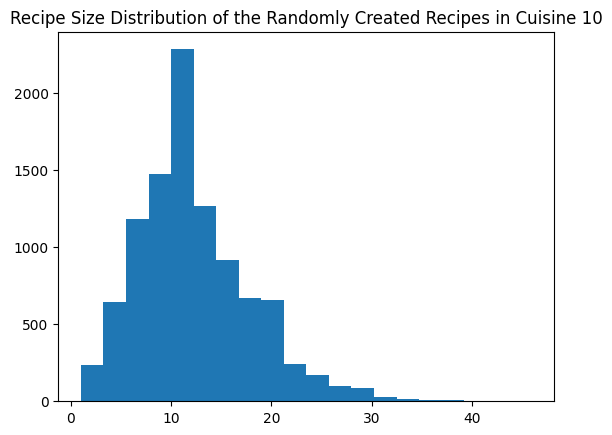

In [81]:
#Plot the recipe size distribution of the original cuisine and the randomly created recipes in 10 sets.

import matplotlib.pyplot as plt

#put headings in the plot
plt.title('Recipe Size Distribution of the Original Cuisine')
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(df_cuisine_ini['recipe_Ingredients'][i].split(',')))
                       
plt.hist(recipe_size, bins=20)
plt.show()

#put headings in the plot
for i in range(0, no_of_cuisines):
    recipe_size = []
    for j in range(0, len(size_controlled_cuisines[i])):
        recipe_size.append(len(size_controlled_cuisines[i]['ingredients'][j]))
    plt.title('Recipe Size Distribution of the Randomly Created Recipes in Cuisine '+str(i+1))
    plt.hist(recipe_size, bins=20)

    plt.show()

#make plots for all the randomly created cuisines in a single plot



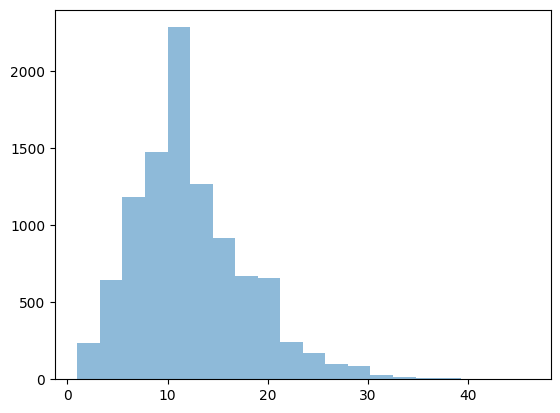

In [82]:
#find recipe size distribution of the original cuisine
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(df_cuisine_ini['recipe_Ingredients'][i].split(',')))

plt.hist(recipe_size, bins=20, alpha=0.5, label='Original Cuisine')

#convert the plot to cdf

# Calculate the cumulative distribution
sorted_recipe_size = np.sort(recipe_size)
cdf = np.arange(1, len(sorted_recipe_size) + 1) / len(sorted_recipe_size)






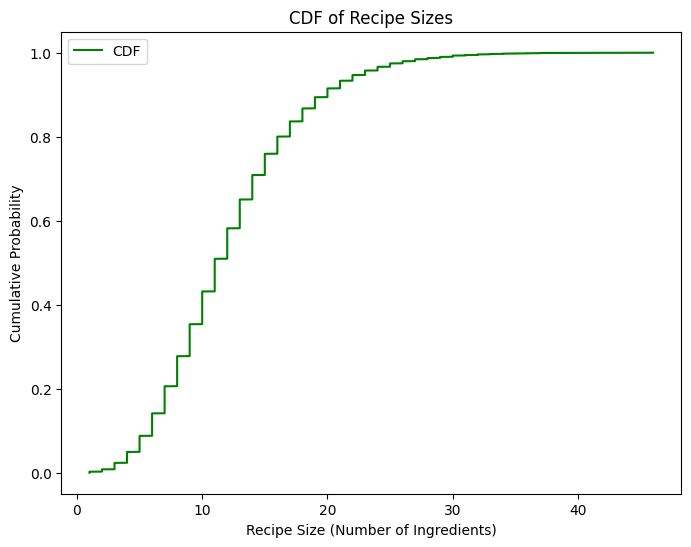

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate recipe sizes from the original cuisine
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(df_cuisine_ini['recipe_Ingredients'][i].split(',')))

# Step 2: Sort the recipe sizes and compute the CDF
sorted_recipe_size = np.sort(recipe_size)
cdf = np.arange(1, len(sorted_recipe_size) + 1) / len(sorted_recipe_size)

# Step 3: Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_recipe_size, cdf, label='CDF', color='green')

# Add labels and title
plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Recipe Sizes')
plt.legend()

# Show the plot
plt.show()


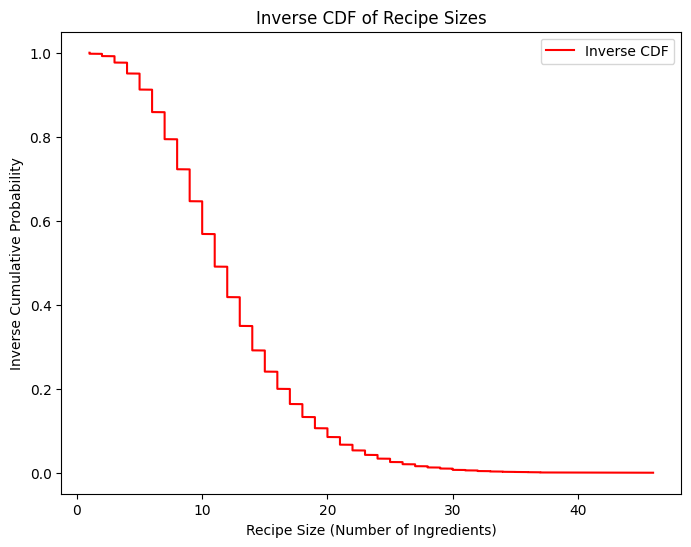

In [84]:
#plot inverse cdf
plt.figure(figsize=(8, 6))
plt.plot(sorted_recipe_size, 1 - cdf, label='Inverse CDF', color='red')

# Add labels and title
plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Inverse Cumulative Probability')
plt.title('Inverse CDF of Recipe Sizes')
plt.legend()

# Show the plot
plt.show()


In [89]:
cuisine_recipe_size = []

for i in range(0, no_of_cuisines*10000):
    random_prob = np.random.uniform(0, 1)
    x_intercept = np.interp(random_prob, cdf, sorted_recipe_size)
    # print(random_prob)
    # print(x_intercept)
    cuisine_recipe_size.append(x_intercept)
    

In [91]:
len(cuisine_recipe_size)

100000

In [93]:
size_controlled_cuisines_inv_trfm = []

# for i in range(0, no_of_cuisines):
# print(i)
d={}
d['recipe_id'] = []
d['ingredients'] = []
for i in range(0, len(df_cuisine_ini)*10):
    n = int(cuisine_recipe_size[i])
    #take out random n ingredients from the ingredients list
    ingredient_random = ingredients_df['ingredient'].sample(n=n).to_list()
    # print(ingredient_random)
    d['recipe_id'].append("R"+str(i+1))
    d['ingredients'].append(ingredient_random)
df = pd.DataFrame(d)
size_controlled_cuisines_inv_trfm.append(df)

# size_controlled_cuisines




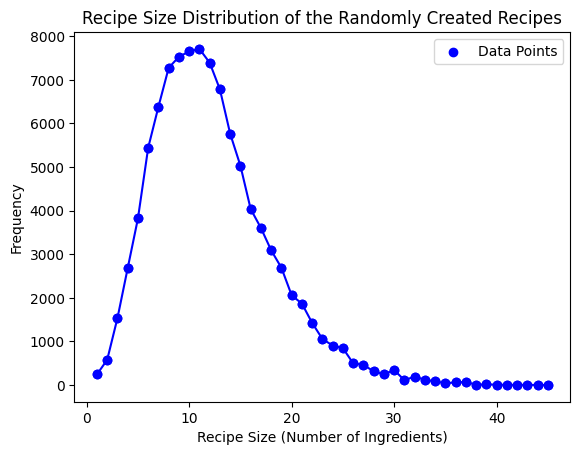

In [97]:
for i in range(0, 1):
    recipe_size = []
    for j in range(0, len(size_controlled_cuisines_inv_trfm[i])):
        recipe_size.append(len(size_controlled_cuisines_inv_trfm[i]['ingredients'][j]))
    
    plt.title('Recipe Size Distribution of the Randomly Created Recipes')

    # Get unique sizes and their counts
    unique_sizes, counts = np.unique(recipe_size, return_counts=True)
    
    # Plot the scatter plot (dots)
    plt.scatter(unique_sizes, counts, color='blue', label='Data Points')

    # Plot the line connecting the dots
    plt.plot(unique_sizes, counts, color='blue', linestyle='-', marker='o')

    # Add labels for clarity
    plt.xlabel('Recipe Size (Number of Ingredients)')
    plt.ylabel('Frequency')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()
